## Time Series Modeling 

Generally speaking, Dataset can show distinct types of trends (namely: upward linear, downward, exponential, periodic trends etc.. etc..). For Time Series, assesing trends, the major components of these trends, and understanding the correlation is key before conducting any modeling. This is because Time Series need to be stationary for optimization of modeling, were the mean is constant, and the variance and covariance are not a function of time. 

I'll asses the my dataset by decomposing these factors such as trends and seasonality, and finding out the stationarity of my dataset by visualization of trends and conducting statistical testing. Following that I can remove the trends (detrend) and difference the dataset to me it make it more stationary and move onto modeling. 

Data Analysis & Modeling Objectives:
   - Understand Fund prices over a 5 year period
   - Predict 1 year fund price

# PHASE 1

#### Importing Libraries

In [75]:
#Importing Libraries
#Data Manipulation
import numpy as np
import pandas as pd
import datetime
from datetime import datetime as dt

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import folium
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.dates import AutoDateLocator, ConciseDateFormatter
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.style.use('ggplot')

#importing libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from random import gauss as gs

## Project Notebook Settings
pd.set_option('display.max_columns',0)

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-notebook')
#plt.style.use('seaborn-notebook')

#Modeling & Forecasting
import itertools
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit

import warnings
warnings.filterwarnings ('ignore')

#Statistical Modeling
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [2]:
#importing libraries
#plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
#matplotlib.rcParams['axes.labelsize'] = 14
#matplotlib.rcParams['xtick.labelsize'] = 12
#matplotlib.rcParams['ytick.labelsize'] = 12
#matplotlib.rcParams['text.color'] = 'k'

In [3]:
#Bringing stored Dataset
%store -r df_cleaned
%matplotlib inline

In [4]:
#Checking for saved Dataset
df_cleaned.head()

,Close
Date,
2018-08-02,23.120001
2018-08-03,23.230000
2018-08-06,23.240000
2018-08-07,23.290001
2018-08-08,23.290001


##### Resampling Closing Price to Monthly

In [5]:
#Making Dataset per month
y= df_cleaned['Close'].resample('MS').mean()

### Assesing Trends 

Assesing trends is the next step to determine what I need to do with the Dataset and prepare it for modeling, I'll go into these details:

- Decomposition (Visualizing Seasonality, Trends, Noise)
- Rolling Mean
- Dickey Fuller Testing

#### Components of Time Series Trends

Time series is affected by four components. They can be separated from the observed data and in include : Trend, Seasonailty,  Cyclical, and Irregular Components.

- **Trends**: The long term movement of the time series. For example, series relating to growth of stock, show upward trend


- **Seasonality**: Fluctuations in the data set that follow a regular pattern, cause by outside influences. For example, ice cream sales up in summer months.  


- **Cyclical**: When the data rises or falls at non fixed periods. For example, For example, business cycles, in stock, people selling their loosing stock in the year end might drive down always the price of stock.


- **Irregular**: Caused by unpredicatable differences. For example, a surprised announcement of a merger and acquisition might drive up or down the price of a stock. 

####  Decomposition of Time Series

Time series data can exhibit a variety of patterns, and it is often helpful to split a time series into several components, each representing an underlying pattern category.
These TS major components are : Seasonal component. Cyclical component. Irregular (noise) component. These components are important because they can affect the time lags or how the lags are shown.

Next, I'll visualize my data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

#### Visualizations 

Below a graphical depiction of:

- Data
- Trend
- Seasonality
- Residuals

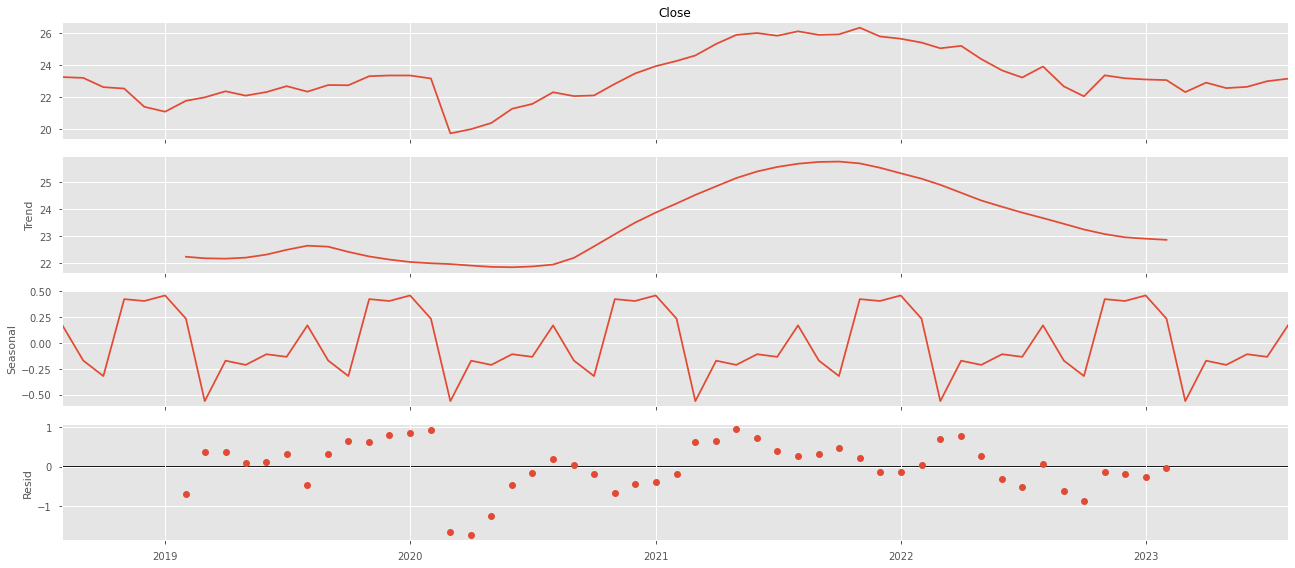

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

#### Asssesing Stationarity 

 A **Stationary Time Series** is one whose statistical properties such as mean and variance are almost all constant over time. Most statistical forecasting methods are based on the assumption that when it comes to time series, they can be mathematically transformed to be almost all stationary. A stationarized series is relatively easy to predict since the statistical properties in the future will be the same as in the past. From satistical perspective, I can asses the stationarity of my dataset by conducting a **Dickey-Fuller Test**, as per below.

<Figure size 1296x576 with 0 Axes>

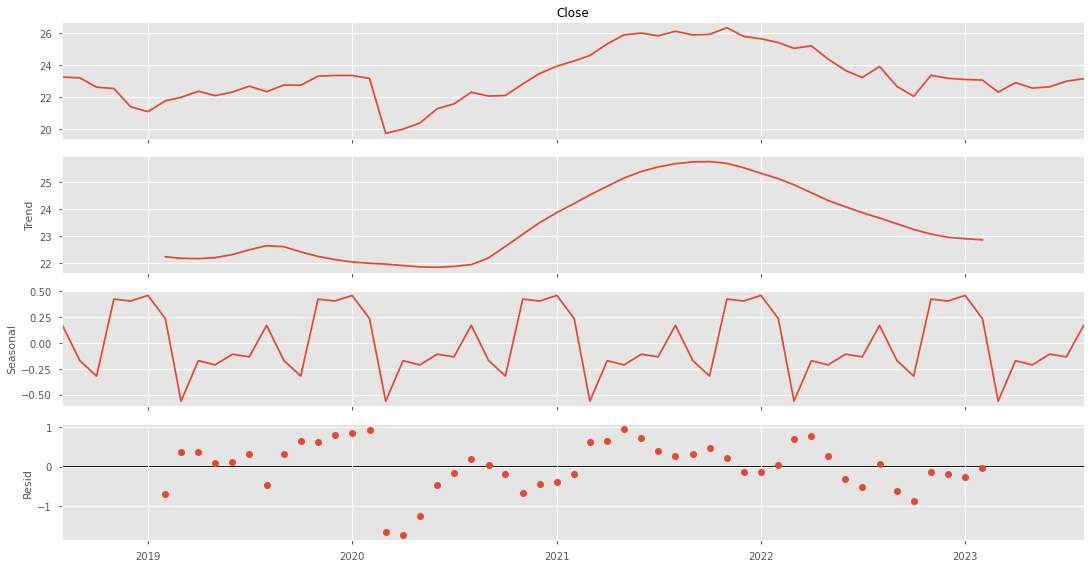

In [7]:
decompositions=seasonal_decompose(y)
fig= plt.figure()
fig= decomposition.plot()
fig.set_size_inches(15,8)

The plots above clearly shows the data, the trend , the seasonality and residual components. It shows that there is no stability and that and upward trend is  possible along with seasonality. I can see that this TS may be non-stationary by visual inspection. 

####  Rolling Mean

Another way of assesing trends is that I can plot the moving average or moving variance and see if it varies with time with the rolling method.

In [8]:
# Determine rolling statistics
roll_mean = y.rolling(window=12, center=False).mean()
roll_std = y.rolling(window=12, center=False).std()

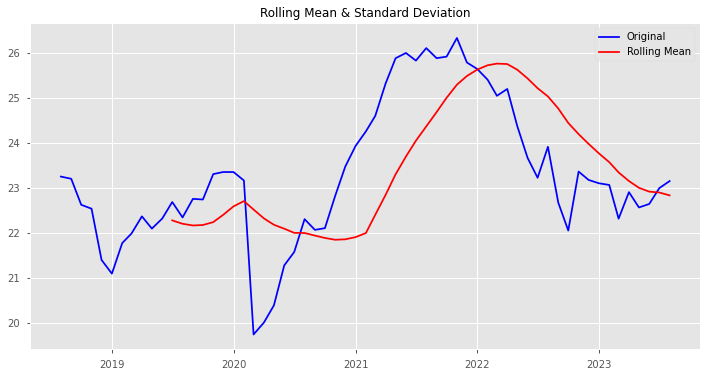

In [9]:
# Plot rolling statistics
fig = plt.figure(figsize=(12,6))
plt.plot(y, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

Clearly this dataset has a moving variance over time. 

#### Dickey-Fuller Test

A Dickey-Fullet Test, tests if the the data is stationary or not.
The null hypothesis of this test is that time series is not stationary. I'll asses with p.value <.05 , if that holds true the hypothesis is rejected and I say TS is stationary otherwise I'll fail to reject the null hypothesis and the data is not stationary. 

In [10]:
#Testing Stationarity of Daily values data set: df_cleaned
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import adfuller

# Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test: \n')
dftest = adfuller(df_cleaned)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test: 

Test Statistic                   -2.365286
p-value                           0.151775
#Lags Used                        9.000000
Number of Observations Used    1247.000000
Critical Value (1%)              -3.435605
Critical Value (5%)              -2.863861
Critical Value (10%)             -2.568005
dtype: float64


In [11]:
#Anothe way of testing stationarity of Monthly Values data set: y
timeseries= y

In [12]:
#defining 
def test_stationarity(timeseries, window):
    
    #determining rolling statistics
    rolmean= timeseries.rolling(window=window).mean()
    rolstd= timeseries.rolling(window=window).std()
    
    #Plotting rolling statistics
    fig= plt.figure
    orig=plt.plot(timeseries.iloc[window:], color='blue', label='Original')
    mean=plt.plot(rolmean, color='red', label='Rol Mean')
    std=plt.plot(rolstd, color='black', label='Rol Std')
    plt.legend (loc='best')
    plt.title ('Rolling Mean and Std')
    plt.show()
    
    #Perform Dickey Fuller Test. 
    print ('Result from Dickey-Fuller Testing')
    dftest= adfuller(timeseries, autolag='AIC')
    dfoutput= pd.Series(dftest[0:4], index =['Test Statistic', 'p-value', '#of lags used', '#of Observations used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value(%s)'%key]= value
    print (dfoutput)

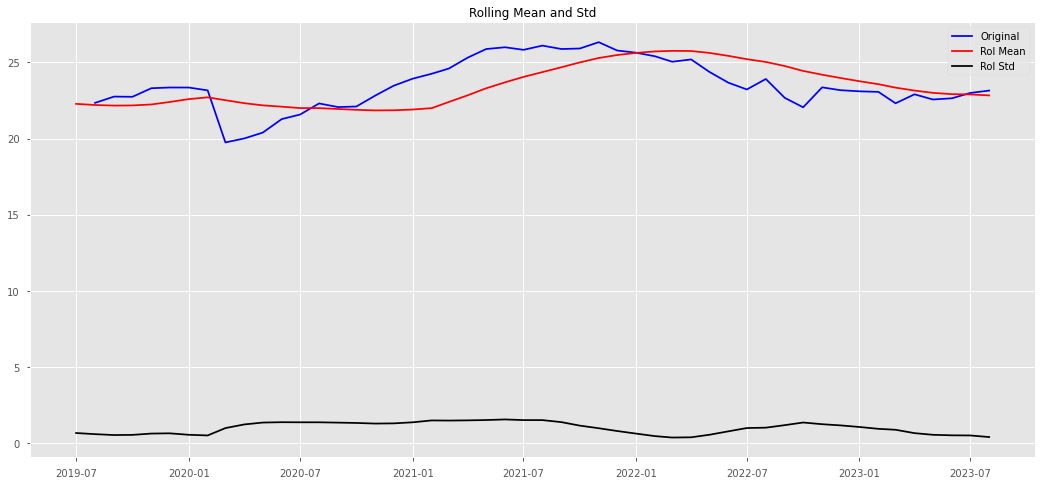

Result from Dickey-Fuller Testing
Test Statistic           -1.642630
p-value                   0.460887
#of lags used             0.000000
#of Observations used    60.000000
Critical Value(1%)       -3.544369
Critical Value(5%)       -2.911073
Critical Value(10%)      -2.593190
dtype: float64


In [13]:
#testing stationarity of untransformed data set yearly : y
test_stationarity (y, 12)

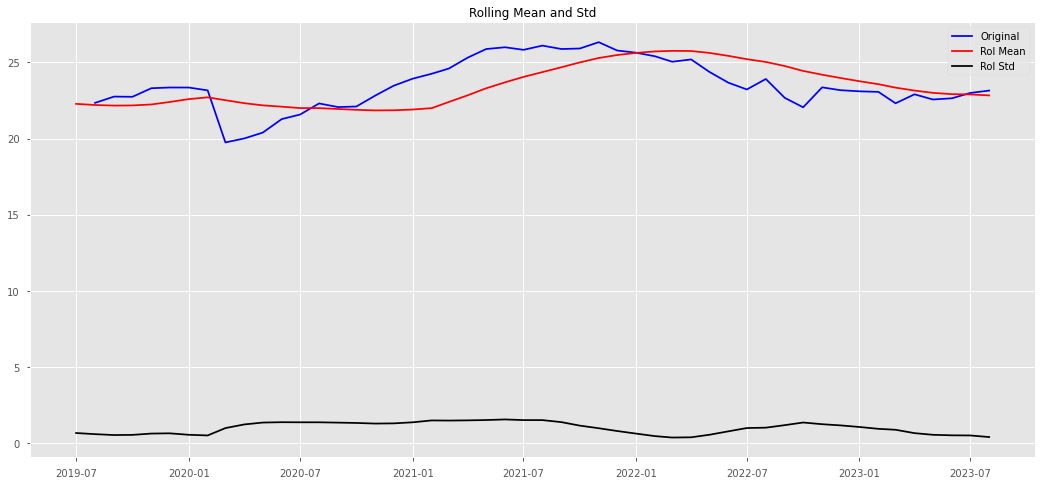

Result from Dickey-Fuller Testing
Test Statistic           -1.642630
p-value                   0.460887
#of lags used             0.000000
#of Observations used    60.000000
Critical Value(1%)       -3.544369
Critical Value(5%)       -2.911073
Critical Value(10%)      -2.593190
dtype: float64


In [14]:
#### Test the stationarity of the Unstransformed Data Set daily df_cleaned
test_stationarity (y, 12)

##### Conclusion on Stationarity 
As a result, the null hypothesis can not be rejected beause the p-value is not <.05. I conclude the data is not stationary and I must remove the trends through differencing, and understanding auto correlation and partial autocorrelation.

# PHASE 2

### Differencing

**Differencing** is a technique to transform a non-stationary time series into a stationary one. It involves subtracting the current value of the series from the previous one, or from a lagged value. It can be used to remove the series dependence on time like trends and seasonality. This is an important step in preparing the data used in ARIMA Modeling. To do this we can code a new plot showing the differencing applied. Let's also understand the sub-components of Auto Correlation and Partial Autocorrelation.

The value of time gap being considered and is called the lag. A lag 1 autocorrelation is the correlation between values that are one time period apart. More generally, a lag k autocorrelation is the correlation between values that are k time periods apart.

Now that I know that the data is not stationary, I'll do one of the most common methods of dealing with both trend and seasonality, called differencing.  In this technique, I take the difference of an observation at a particular time instant with that at the previous instant (also known as a "lag").

#####  Differencing and Viewing

In [15]:
type(y)

pandas.core.series.Series

In [16]:
#Converting Y dictionary into Pandas DataFrame calling it ts_df for differencing demonstration
ts_df = pd.DataFrame(y)
ts_df.head()

,Close
Date,
2018-08-01,23.250000
2018-09-01,23.200526
2018-10-01,22.623044
2018-11-01,22.536190
2018-12-01,21.397895


In [17]:
type(ts_df)

pandas.core.frame.DataFrame

In [18]:
data_diff = ts_df.diff(periods=1)
data_diff.head(10)

,Close
Date,
2018-08-01,NaN
2018-09-01,-0.049473
2018-10-01,-0.577483
2018-11-01,-0.086853
2018-12-01,-1.138296
2019-01-01,-0.304085
2019-02-01,0.678822
2019-03-01,0.214511
2019-04-01,0.379047


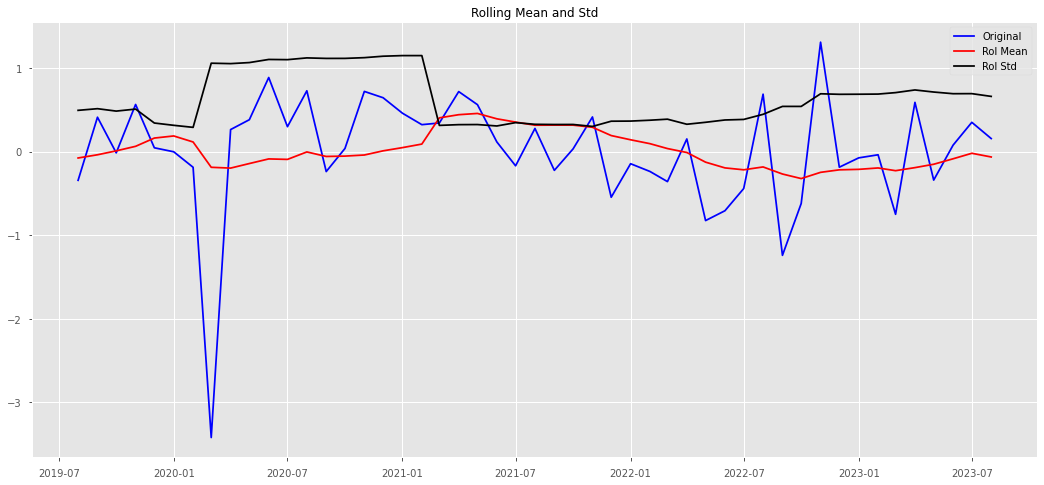

Result from Dickey-Fuller Testing


MissingDataError: exog contains inf or nans

In [20]:
test_stationarity (data_diff, 12)

### Differenced Dataset ACF & PACF 

In [21]:
#For time series decomposition season decompose
from statsmodels.tsa.seasonal import seasonal_decompose
#Statsmodels for plotting the acf and pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#Pandas plotting import
from pandas.plotting import autocorrelation_plot,lag_plot


In [22]:
#Defining plot
def plot_acf_pacf(ts, figsize=(10,8),lags=24):
    
    fig,ax = plt.subplots(nrows=3,
                          figsize=figsize)
    
    ## Plot ts
    ts.plot(ax=ax[0])
    
    ## Plot acf, pavf
    plot_acf(ts,ax=ax[1],lags=lags)
    plot_pacf(ts, ax=ax[2],lags=lags) 
    fig.tight_layout()
    
    for a in ax[1:]:
        a.xaxis.set_major_locator(mpl.ticker.MaxNLocator(min_n_ticks=lags, integer=True))
        a.xaxis.grid()
    return fig,ax

#### Coding for ACF and PACF 

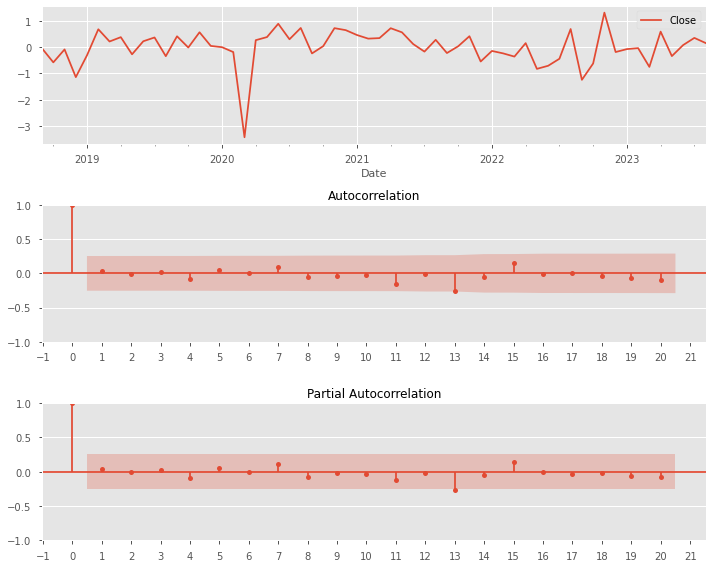

In [23]:
#Coding ts.diff Differencing
plot_acf_pacf(data_diff.dropna(),lags=20);

**ACF**
Autocorrelation is a measure of how much the data sets at one point in time influences data sets at a later point in time- ACF seeks to identify how correlated the values in a time series are with each other.
The ACF starts at a lag of 0, which is the correlation of the time series with itself and therefore results in a correlation of 1. The ACF plots the correlation coefficient against the lag, which is measured in terms of a number of periods or units. In essence, its a measure of the link between the present and the past, therefore it helps us identify the moving average.



**PACF**
Partial Autocorrelation (PACF) is a measure, that can plot the partial correlation coefficients between the series and lags of itself. In general, the "partial" correlation between two variables is the amount of correlation between them, which is not explained by their mutual correlations with a specified set of other variables.
In general, the "partial" correlation between two variables is the amount of correlation between them which is not explained by their mutual correlations with a specified set of other variables. PACF therefore helps us identify the Auto regressive order. PACF measures directs effects a.k.a Auto Regressive.


 
Both, ACF and PACF can provide valuable insights into the behaviour of time series data. They are often used to decide the number of Autoregressive (AR) and Moving Average (MA) lags for the ARIMA models. Moreover, they can also help detect any seasonality within the data. The correct application and interpretation are essential in extracting useful information from the ACF and PACF p

**WHAT IS THE DIFFERENCE BETWEEN ACF and PACF ?**



Partial autocorrelation function (PACF) gives the partial correlation of a stationary time series with its own lagged values, regressed the values of the time series at all shorter lags. It contrasts with the autocorrelation function, which does not control for other lags.

Both, ACF and PACF can provide valuable insights into the behaviour of time series data. They are often used to decide the number of Autoregressive (AR) and Moving Average (MA) lags for the ARIMA models. Moreover, they can also help detect any seasonality within the data. The correct application and interpretation are essential in extracting useful information from the ACF and PACF plots.

ACF and PACF can provide valuable insights into the behaviour of time series data. They are often used to decide the number of Autoregressive (AR) and Moving Average (MA) lags for the ARIMA models. Moreover, they can also help detect any seasonality within the data. The correct application and interpretation are essential in extracting useful information from the ACF and PACF plots.


# Phase 3 - Modeling 

#### Train Test Split

I'll be conducting a train/test split to start modeling

In [24]:
#Recalling the series
type(y)

pandas.core.series.Series

In [25]:
#Recalling index
y.index

DatetimeIndex(['2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01', '2019-02-01', '2019-03-01',
               '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01',
               '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
               '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01',
               '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
               '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01',
               '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01',
               '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01',
               '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01',
               '2021-12-01', '2022-01-01', '2022-02-01', '2022-03-01',
               '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01',
               '2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01',
               '2022-12-01', '2023-01-01', '2023-02-01', '2023-03-01',
      

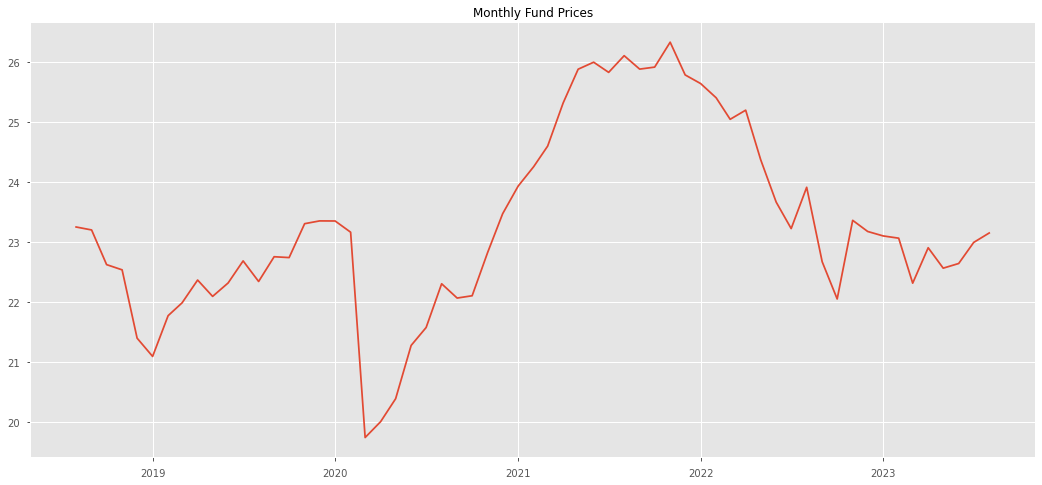

In [26]:
fig, ax = plt.subplots()
ax.plot(y)
ax.set_title("Monthly Fund Prices");

In [27]:
#find. the index which allows to split off 20% of the data
cutoff= round(y.shape[0]*0.80)
cutoff

49

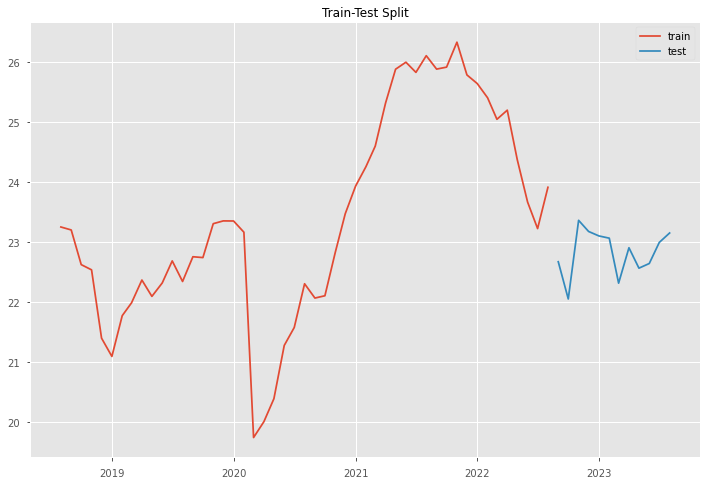

In [28]:
train = y[:cutoff]

test= y[cutoff:]

fig,ax =plt.subplots(figsize=(12,8))
ax.plot(train, label='train')
ax.plot(test, label='test')
ax.set_title ('Train-Test Split');
plt.legend();

#### Cross validation

I'm also going to use sklearn's in-buit class to prepare model for a kind of cross validation

In [29]:
split= TimeSeriesSplit()
for train_ind, val_ind in split.split(train):
    print (train_ind, val_ind)

[0 1 2 3 4 5 6 7 8] [ 9 10 11 12 13 14 15 16]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] [17 18 19 20 21 22 23 24]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24] [25 26 27 28 29 30 31 32]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32] [33 34 35 36 37 38 39 40]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40] [41 42 43 44 45 46 47 48]


In [30]:
#Showing the indecis of the validation folds. Position of our indecis position of data points in sequence.
#training and validation splits, 5 is the default
#they differ from split to split, 
#validation starts where training left of .
#taking larger and larger training point and validating on recent past.

### Baseline model

Building a base line model. Naive model is a simple model of the train data shifted by 1. 

In [31]:
#looking at train data
train

Date
2018-08-01    23.250000
2018-09-01    23.200526
2018-10-01    22.623044
2018-11-01    22.536190
2018-12-01    21.397895
2019-01-01    21.093810
2019-02-01    21.772632
2019-03-01    21.987143
2019-04-01    22.366190
2019-05-01    22.094091
2019-06-01    22.317500
2019-07-01    22.685000
2019-08-01    22.342273
2019-09-01    22.754500
2019-10-01    22.740435
2019-11-01    23.305000
2019-12-01    23.351428
2020-01-01    23.350000
2020-02-01    23.163158
2020-03-01    19.742727
2020-04-01    20.007143
2020-05-01    20.389500
2020-06-01    21.276818
2020-07-01    21.575909
2020-08-01    22.304286
2020-09-01    22.066190
2020-10-01    22.104546
2020-11-01    22.825500
2020-12-01    23.470909
2021-01-01    23.931053
2021-02-01    24.254211
2021-03-01    24.597391
2021-04-01    25.316191
2021-05-01    25.878500
2021-06-01    25.995000
2021-07-01    25.825714
2021-08-01    26.103636
2021-09-01    25.880000
2021-10-01    25.913334
2021-11-01    26.328572
2021-12-01    25.783182
2022-01-01 

In [32]:
#Naive model, train data shifted by 1 
naive= train.shift(1)
naive

Date
2018-08-01          NaN
2018-09-01    23.250000
2018-10-01    23.200526
2018-11-01    22.623044
2018-12-01    22.536190
2019-01-01    21.397895
2019-02-01    21.093810
2019-03-01    21.772632
2019-04-01    21.987143
2019-05-01    22.366190
2019-06-01    22.094091
2019-07-01    22.317500
2019-08-01    22.685000
2019-09-01    22.342273
2019-10-01    22.754500
2019-11-01    22.740435
2019-12-01    23.305000
2020-01-01    23.351428
2020-02-01    23.350000
2020-03-01    23.163158
2020-04-01    19.742727
2020-05-01    20.007143
2020-06-01    20.389500
2020-07-01    21.276818
2020-08-01    21.575909
2020-09-01    22.304286
2020-10-01    22.066190
2020-11-01    22.104546
2020-12-01    22.825500
2021-01-01    23.470909
2021-02-01    23.931053
2021-03-01    24.254211
2021-04-01    24.597391
2021-05-01    25.316191
2021-06-01    25.878500
2021-07-01    25.995000
2021-08-01    25.825714
2021-09-01    26.103636
2021-10-01    25.880000
2021-11-01    25.913334
2021-12-01    26.328572
2022-01-01 

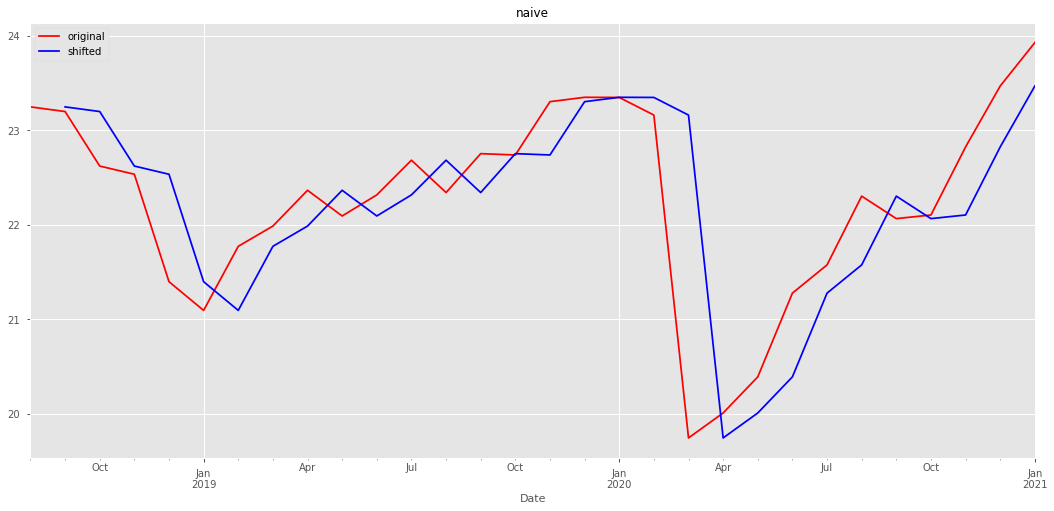

In [33]:
#Plot Naive
fig, ax= plt.subplots()
train[:30].plot(ax=ax, c='r', label ='original')
naive[:30].plot(ax=ax, c='b', label= 'shifted')
ax.set_title('naive')
ax.legend();

Naive model looks it follows decently. 
Now I'll check on it, starting at the second data point because of the NAN Value.

For a baseline to compare to later models, Calculating the **RMSE** for the naive model:

In [34]:
#RMSE
np.sqrt(mean_squared_error(train[1:],naive.dropna()))

0.6705798183221732

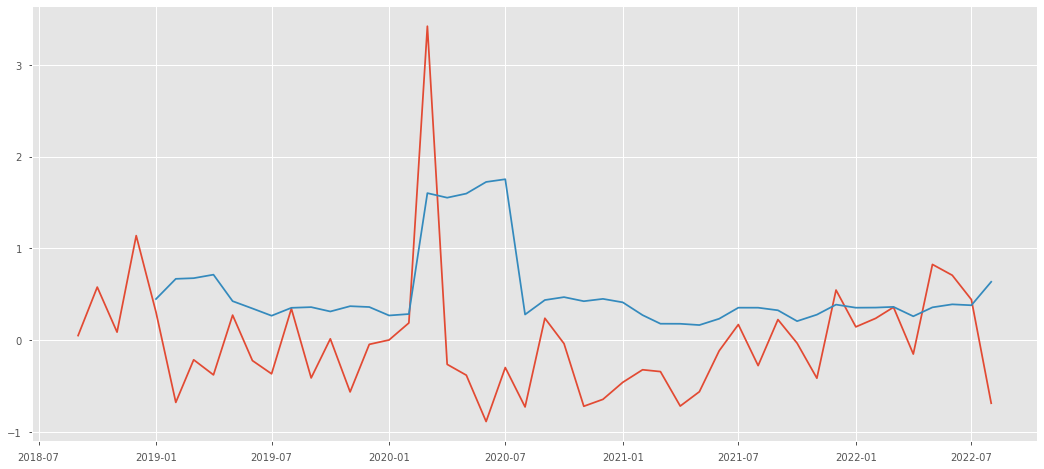

In [35]:
#Rolling mean of residuals for the naive model
fig, ax = plt.subplots()
residuals = naive[1:] - train [1:]
ax.plot(residuals)
ax.plot (residuals.rolling(5).std());

The performance of this model still shows trends in the model. They don't look like white noise, there's still variation here. So I can try other models.

## Additional Models

### ARIMA MODELS

ARIMA models are made up of three different parameters or terms:
- d: The degree of differencing.
- p: The order of the auto-regressive (AR) model (i.e., the number of lag observations). A time series is considered AR when previous values in the time series are very predictive of later values. An AR process will show a very gradual decrease in the ACF plot.
- q: The order of the moving average (MA) model. This is essentially the size of the “window” function over time series data.

**Understanding Lags**

This is th value of the time gap being considered. A lag 1 autocorrelation is the correlation between values that are one time period apart. More generally, a lag k autocorrelation is the correlation between values that are k time periods apart

A lag 1 autocorrelation is the correlation between values that are one time period apart. More generally, a lag k autocorrelation is the correlation between values that are k time periods apart. The number of lags is typically small of 1 or 2 lags. For the purpose of this project,given that this is montly data, my approach is 20 lags (usually the appropriate lags for monthly data is 6, 12 or 24 lags, depending on sufficient data points and for quarterly data, 1 to 8 lags). This concept will play a part in understanding the components of Time-Series.

###### Non Differenced Train Data vs. Differenced Train Data

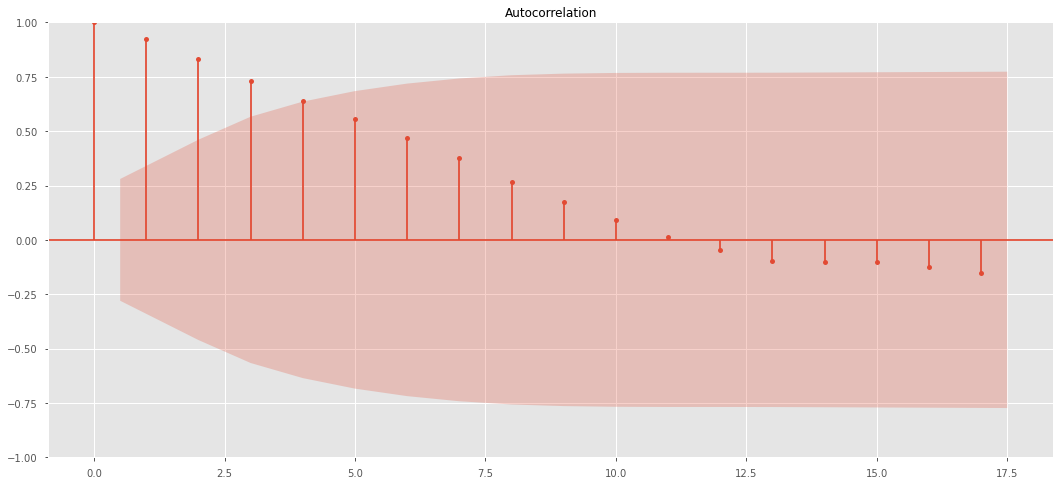

In [36]:
#Looking acf with non-differenced trained data
plot_acf(train);

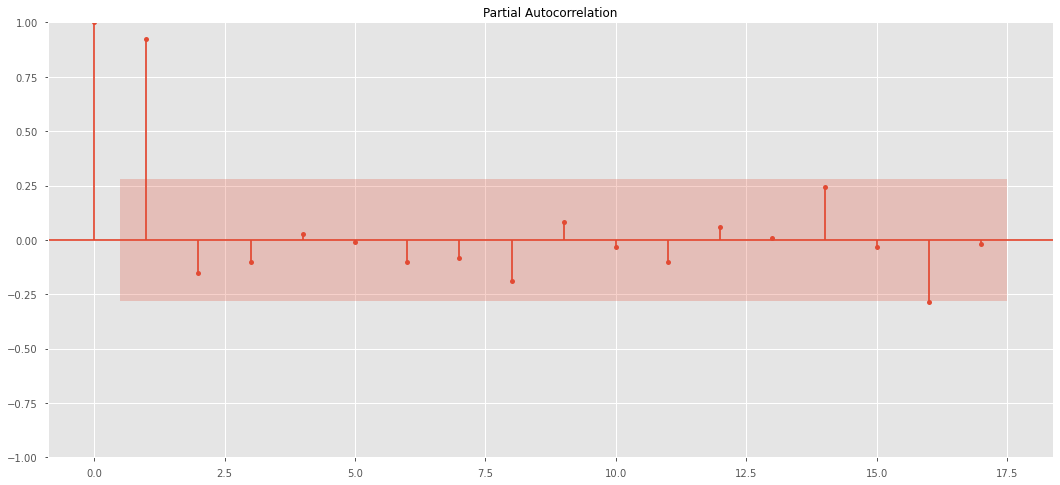

In [37]:
#Looking at pacf non-differenced train data
plot_pacf(train.dropna());

### Differencing

d= 1 below, is a parameter that refers to the number of differencing transformations required by the time series to get stationary. By making the time series stationary I have basically made the mean and variance constant over time. It is easier to predict when the series is stationary.

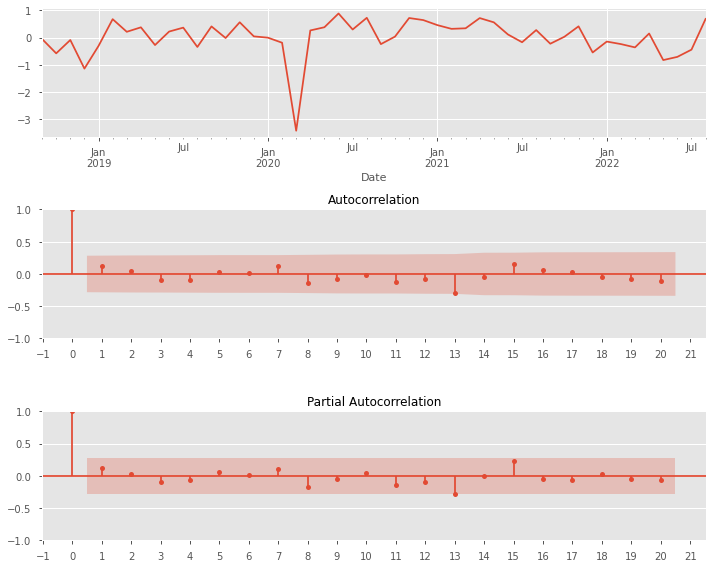

In [38]:
#Summary of differenced data
d=1 
plot_acf_pacf(train.diff(d).dropna(),lags=20);

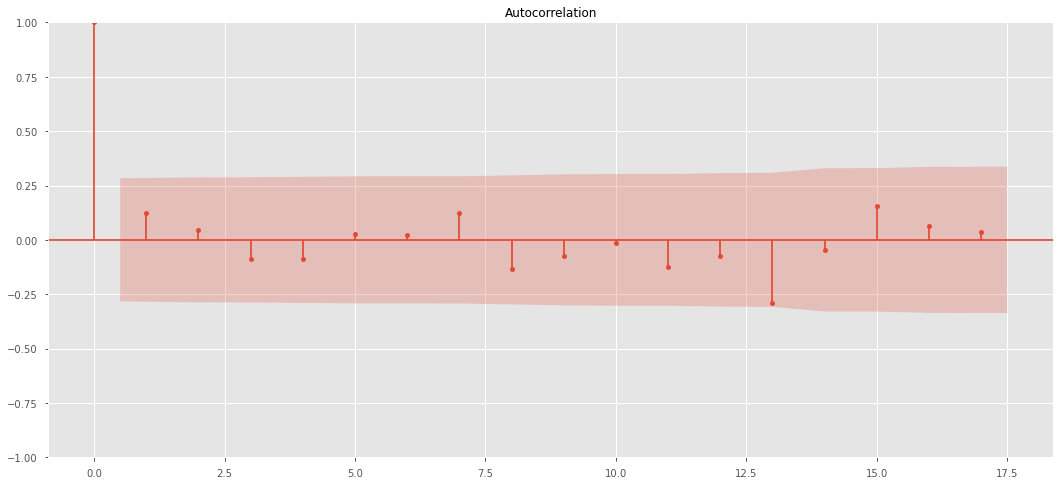

In [39]:
# Difference on train data
plot_acf(train.diff().dropna());

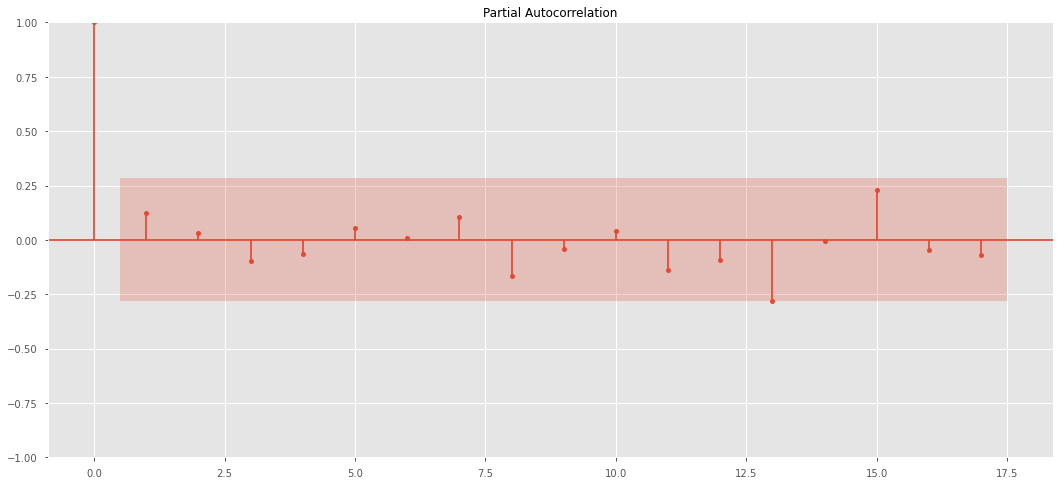

In [40]:
plot_pacf(train.diff().dropna());

 #### Dickey-Fuller on Differenced Data

In [41]:
p_val= adfuller(train.diff()[1:])[1]
print (f"The p-value associated with the Dickey-Fuller statistical test is {p_val}, ")
if p_val <0.05:
    print ("so we can safely assume that the differenced data is stationary.")
else:
    print("so we cannot reject the null hypothesis that the differenced datais not stationary.")

The p-value associated with the Dickey-Fuller statistical test is 3.960547637418115e-07, 
so we can safely assume that the differenced data is stationary.


### Model 1 and 2 : The Autoregressive Models.  AR(1) & AR(2)

In [42]:
ar_1= ARIMA(train, order=( 1, 1, 0)).fit()

#I put typ='levels' to convert our predictions to remove the differencing performed.
ar_1.predict(typ='levels')

Date
2018-08-01     0.000000
2018-09-01    23.250001
2018-10-01    23.194309
2018-11-01    22.550468
2018-12-01    22.525275
2019-01-01    21.254838
2019-02-01    21.055593
2019-03-01    21.857943
2019-04-01    22.014102
2019-05-01    22.413827
2019-06-01    22.059895
2019-07-01    22.345577
2019-08-01    22.731186
2019-09-01    22.299200
2019-10-01    22.806307
2019-11-01    22.738667
2019-12-01    23.375952
2020-01-01    23.357263
2020-02-01    23.349821
2020-03-01    23.139676
2020-04-01    19.312862
2020-05-01    20.040373
2020-06-01    20.437553
2020-07-01    21.388332
2020-08-01    21.613498
2020-09-01    22.395825
2020-10-01    22.036268
2020-11-01    22.109366
2020-12-01    22.916107
2021-01-01    23.552021
2021-02-01    23.988881
2021-03-01    24.294824
2021-04-01    24.640520
2021-05-01    25.406526
2021-06-01    25.949169
2021-07-01    26.009641
2021-08-01    25.804439
2021-09-01    26.138565
2021-10-01    25.851895
2021-11-01    25.917523
2021-12-01    26.380757
2022-01-01 

In [43]:
ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                   49
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -48.546
Date:                Mon, 21 Aug 2023   AIC                            101.092
Time:                        10:24:45   BIC                            104.834
Sample:                    08-01-2018   HQIC                           102.506
                         - 08-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1257      0.167      0.754      0.451      -0.201       0.452
sigma2         0.4424      0.035     12.518      0.000       0.373       0.512
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               347.53
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -2.79
Prob(H) (two-sided):                  0.82   Kurtosis:                        14.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
ar_1.aic

101.09197913224119

### Measuring the Model: AIC

**Akaike Information Criterion** (AIC) score helps me compare models. AIC estimates the relative amount of informationa lost by a given model. The less information the model losses the higher the quality of that model. So I want to look for lower scores.

In [45]:
print (f' AR (1, 1, 0) AIC : {ar_1.aic}')

 AR (1, 1, 0) AIC : 101.09197913224119


#### RMSE Model 1

In [46]:
y_hat_ar1= ar_1.predict(typ='levels')
np.sqrt(mean_squared_error(train, y_hat_ar1))

3.386044173337061

### Model AR(2)

In [50]:
ar_2 = ARIMA (train, order= (2, 1, 0)).fit()
ar_2.predict(typ='levels')

Date
2018-08-01     0.000000
2018-09-01    23.250001
2018-10-01    23.194337
2018-11-01    22.551482
2018-12-01    22.508148
2019-01-01    21.257161
2019-02-01    21.022412
2019-03-01    21.845770
2019-04-01    22.033746
2019-05-01    22.418680
2019-06-01    22.072570
2019-07-01    22.336356
2019-08-01    22.736358
2019-09-01    22.311832
2019-10-01    22.794123
2019-11-01    22.751225
2019-12-01    23.373068
2020-01-01    23.374175
2020-02-01    23.351234
2020-03-01    23.140446
2020-04-01    19.322088
2020-05-01    19.935537
2020-06-01    20.443904
2020-07-01    21.396060
2020-08-01    21.639093
2020-09-01    22.401721
2020-10-01    22.059384
2020-11-01    22.101981
2020-12-01    22.914131
2021-01-01    23.571066
2021-02-01    24.006443
2021-03-01    24.307365
2021-04-01    24.648822
2021-05-01    25.413800
2021-06-01    25.968510
2021-07-01    26.026179
2021-08-01    25.808708
2021-09-01    26.132223
2021-10-01    25.861293
2021-11-01    25.910598
2021-12-01    26.379960
2022-01-01 

### Comparing AIC AR(1), AR(2)

In [51]:
#Looking at the AIC
print(ar_1.aic)
print(ar_2.aic)

101.09197913224119
103.0482583155816


##### RMSE Model ar_2

In [52]:
y_hat_ar1= ar_2.predict(typ='levels')
np.sqrt(mean_squared_error(train, y_hat_ar1))

3.385984556338102

## Moving Average Models. ma_1 & ma_2

#### ma_1 AIC

In [54]:
ma_1= ARIMA (train, order=(0,1,1)).fit()
print(ar_1.aic)
print(ar_2.aic)
print (ma_1.aic)

101.09197913224119
103.0482583155816
101.15858026633052


The moving average seem to have an impact on decreasing the AIC! It performs better than our first orde and second order autoregressive, AR(1) and AR(2)

#### Calculating RMSE for Moving Average Model

In [55]:
y_hat_ar1= ma_1.predict(typ='levels')
np.sqrt(mean_squared_error(train, y_hat_ar1))

3.3861369203783234

#### MA(2)

In [56]:
ma_2= ARIMA (train, order=(0,1,2)).fit()

In [57]:
y_hat_ar1= ma_2.predict(typ='levels')
np.sqrt(mean_squared_error(train, y_hat_ar1))

3.385790986628664

#### ma_2 AIC

In [58]:
print(ar_1.aic)
print(ar_2.aic)
print (ma_1.aic)
print (ma_2.aic)

101.09197913224119
103.0482583155816
101.15858026633052
102.91082452440486


### ARIMA Modeling

In [60]:
#Running ARMA 
arma_21= ARIMA (train, order =(2,1,2)).fit()

In [61]:
print(ar_1.aic)
print(ar_2.aic)
print (ma_1.aic)
print (ma_2.aic)
print (arma_21.aic)

101.09197913224119
103.0482583155816
101.15858026633052
102.91082452440486
102.44834183962027


Not a huge improvement for ARMA in terms of the ma_2, but a small improvement. 

### RMSE For all Models on Test Data

In [62]:
###Finding all RMSE's
def find_rmse_test(model, test_data=test):
    y_hat= model.predict(start=test_data.index[0], end=test_data.index[-1],typ='levels')
    return np.sqrt(mean_squared_error (test_data, y_hat))

In [63]:
print (find_rmse_test(ar_1))
print (find_rmse_test(ar_2))
print (find_rmse_test(ma_1))
print (find_rmse_test(ma_2))
print (find_rmse_test(arma_21))

1.2339060089856733
1.2386992106277206
1.2204670449138701
1.2702505527829904
1.4641993681629535


### SARIMAX

**SARIMAX** is an extension of the ARIMA class of models. ARIMA models compose 2 parts: the autoregressive term (AR) and the moving-average term (MA). AR views the value at one time just as a weighted sum of past values. The MA model takes that same value also as a weighted sum but of past residuals. Overall, ARIMA is a very good model. However, it cannot handle seasonality, thus SARIMAX is used in this model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                   49
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -48.928
Date:                Mon, 21 Aug 2023   AIC                             99.855
Time:                        10:24:53   BIC                            101.726
Sample:                    08-01-2018   HQIC                           100.562
                         - 08-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.4497      0.035     12.790      0.000       0.381       0.519
===================================================================================
Ljung-Box (L1) (Q):                   0.80   Jarque-Bera (JB):               343.81
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                            -2.78
Prob(H) (two-sided):                  0.89   Kurtosis:                        14.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

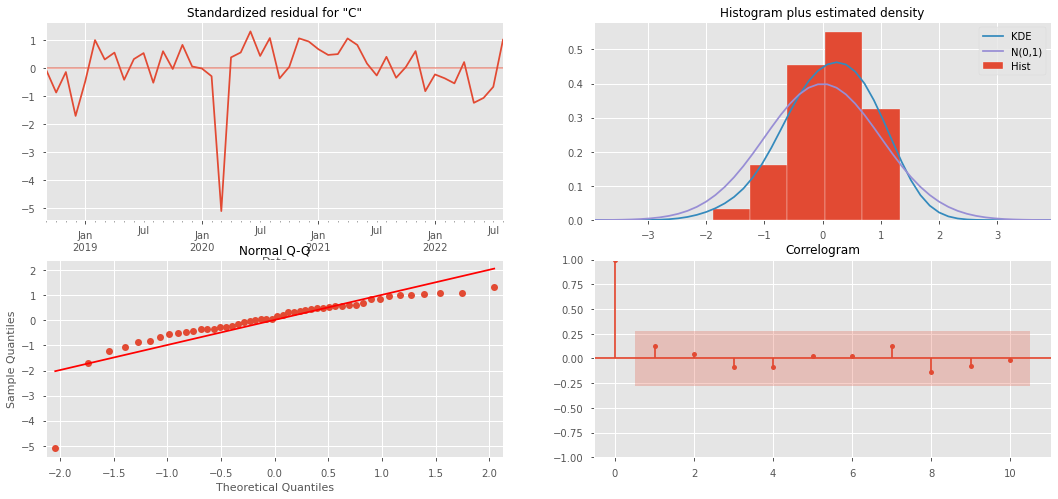

In [64]:
#Using SARIMAX because it is better to use on seasonal data
#from statsmodels.tsa.statespace.sarimax import SARIMAX
## Baseline model from eye-balled params
sar_1 = SARIMAX(train, order=(0,1,0),).fit() 
display(sar_1.summary()) 
sar_1.plot_diagnostics();
plt.show()

**Understanding Charts Above**

- Quantile Plots:
Commonly known as Q-Q Plots, It helps answer the question: "if the set of observations approximately normally distributed?". It is a plot of the quantiles of the first data set against the quantiles of the second data set (Sample vs. Theoritical in this case). Shows you how reliable predictions are within standard deviations. Our Mean Price, is fairly good at predictions within value.


- Histogram plus Estimated Density (KDE)
Undelying distribution for this data. Created bins for the data, and count the number of values creating a histogram. The KDE is the smooth out continous version of that data distribution. Allowing to estimate the probability density function. And the PDF, allows us to find the chances that the value of a random variable will occur within a range of values that you specify. More specifically, a PDF is a function where its integral for an interval provides the probability of a value occurring in that interval.


- Correlogram
A correlogram is a plot of autocorrelations . In time series data, looking at correlations between succesive correlations over time, that are periods apart (it can be 1 period or several periods apart)/For example a data group or point that you observe a month ago or a point you observed two months ago. The horizontal axis is the timeline. The blue shadows are the thresholds. The bars above the shadows are autocorrelations that are statistically significant it is not 0 and they are
It answers the question: 1) Is that Data Random? It is when not all points are above threshold. 2) Is there a trend in the data? There will be a trend, when the autocorrelations coeffiecient do not fall below the critical upper limit (upper limit) at any lag . If there is a trend the data is not stationary.

### AIC's AR, MA, ARIMA & SARIMAX

In [65]:
print(ar_1.aic)
print(ar_2.aic)
print (ma_1.aic)
print (ma_2.aic)
print (arma_21.aic)
print(sar_1.aic)

101.09197913224119
103.0482583155816
101.15858026633052
102.91082452440486
102.44834183962027
99.85529531331296


## Combinations for Sarimax

I want to identify the optimal parameters for my model. Pmdarima's auto_arima function is very useful when building an ARIMA model as it helps us identify the most optimal p,d,q parameters and return a fitted model.But that function is not working, so I'll find combinations and run AIC best combinations.


#### Finding Various Combinations

In [66]:
p = q = range(0, 3)
pdq = list(itertools.product(p, [1], q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, [1], q))]
print('Some combinations for SARIMA')
for i in pdq:
    for s in seasonal_pdq:
        print('SARIMAX: {} x {}'.format(i, s))

Some combinations for SARIMA
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (0, 1, 2, 12)
SARIMAX: (0, 1, 0) x (1, 1, 0, 12)
SARIMAX: (0, 1, 0) x (1, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 1, 2, 12)
SARIMAX: (0, 1, 0) x (2, 1, 0, 12)
SARIMAX: (0, 1, 0) x (2, 1, 1, 12)
SARIMAX: (0, 1, 0) x (2, 1, 2, 12)
SARIMAX: (0, 1, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (0, 1, 1) x (0, 1, 2, 12)
SARIMAX: (0, 1, 1) x (1, 1, 0, 12)
SARIMAX: (0, 1, 1) x (1, 1, 1, 12)
SARIMAX: (0, 1, 1) x (1, 1, 2, 12)
SARIMAX: (0, 1, 1) x (2, 1, 0, 12)
SARIMAX: (0, 1, 1) x (2, 1, 1, 12)
SARIMAX: (0, 1, 1) x (2, 1, 2, 12)
SARIMAX: (0, 1, 2) x (0, 1, 0, 12)
SARIMAX: (0, 1, 2) x (0, 1, 1, 12)
SARIMAX: (0, 1, 2) x (0, 1, 2, 12)
SARIMAX: (0, 1, 2) x (1, 1, 0, 12)
SARIMAX: (0, 1, 2) x (1, 1, 1, 12)
SARIMAX: (0, 1, 2) x (1, 1, 2, 12)
SARIMAX: (0, 1, 2) x (2, 1, 0, 12)
SARIMAX: (0, 1, 2) x (2, 1, 1, 12)
SARIMAX: (0, 1, 2) x (2, 1, 2, 12)
SARIMAX: (1, 1, 0) x (0, 1

#### Finding Best AIC Parameter using Combinations

In [67]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod1=SARIMAX(train,
                         order=param,
                         seasonal_order=param_seasonal,
                         enforce_stationarity=False,
                         enforce_invertibility=False)
            results = mod1.fit()
            print('SARIMAX{}x{} - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            print('No result')
            continue

SARIMAX(0, 1, 0)x(0, 1, 0, 12) - AIC:106.67702038478379
SARIMAX(0, 1, 0)x(0, 1, 1, 12) - AIC:51.39591560800816
SARIMAX(0, 1, 0)x(0, 1, 2, 12) - AIC:28.35352398228434
SARIMAX(0, 1, 0)x(1, 1, 0, 12) - AIC:57.54246306668504
SARIMAX(0, 1, 0)x(1, 1, 1, 12) - AIC:57.66811708093194
SARIMAX(0, 1, 0)x(1, 1, 2, 12) - AIC:30.10795458236596
SARIMAX(0, 1, 0)x(2, 1, 0, 12) - AIC:25.025311383595895
SARIMAX(0, 1, 0)x(2, 1, 1, 12) - AIC:27.025282764029438
SARIMAX(0, 1, 0)x(2, 1, 2, 12) - AIC:28.283116438642185
SARIMAX(0, 1, 1)x(0, 1, 0, 12) - AIC:103.0225168632946
SARIMAX(0, 1, 1)x(0, 1, 1, 12) - AIC:49.37355443065942
SARIMAX(0, 1, 1)x(0, 1, 2, 12) - AIC:24.453107531939057
SARIMAX(0, 1, 1)x(1, 1, 0, 12) - AIC:56.63826627120183
SARIMAX(0, 1, 1)x(1, 1, 1, 12) - AIC:53.76313068045485
SARIMAX(0, 1, 1)x(1, 1, 2, 12) - AIC:26.182950743157004
SARIMAX(0, 1, 1)x(2, 1, 0, 12) - AIC:21.71625355679667
SARIMAX(0, 1, 1)x(2, 1, 1, 12) - AIC:23.712792720934175
SARIMAX(0, 1, 1)x(2, 1, 2, 12) - AIC:24.119181194687656
SA

#### Chosen Combination

I'm trying the best model with LOWEST AIC. SARIMAX(0, 1, 2)x(0, 1, 2, 12) - AIC:17.29819277529672

#### Fitting into model :  sari_mod

In [68]:
sari_mod= SARIMAX (train, 
                   order=(0,1,2),
                  seasonal_order=(0,1,0,12),
                  enforce_stationarity= False,
                  enforce_invertibility=False).fit()

In [69]:
#Root mean square error
print (find_rmse_test(sari_mod))

1.0425431017454418


####  Predicting

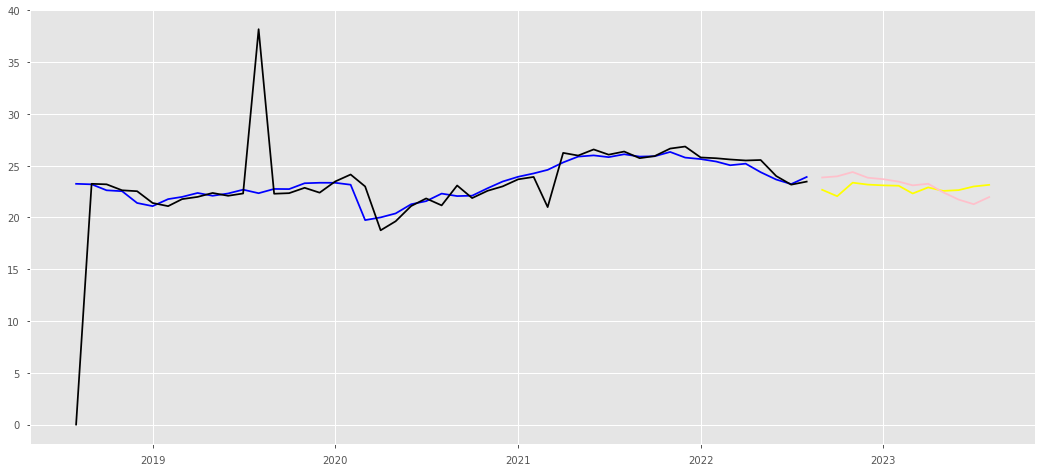

In [70]:
y_hat_train = sari_mod.predict(typ='levels')
y_hat_test = sari_mod.predict(start=test.index[0], end=test.index[-1], typ='levels')

fig, ax= plt.subplots()
ax.plot(train,label = 'train', color='blue')
ax.plot(test,label='test', color ='yellow')
ax.plot(y_hat_train, label='training prediction', color='black')
ax.plot(y_hat_test, label= 'test prediction', color='pink')

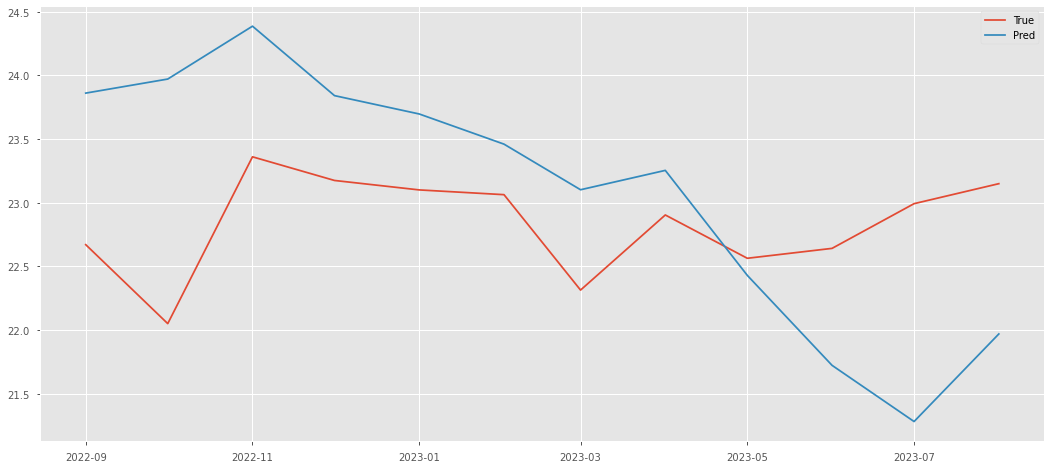

In [71]:
fig, ax= plt.subplots()
ax.plot(test, label ='True')
ax.plot(y_hat_test, label='Pred')

plt.legend()

## FORECAST

In [72]:
sari_mod= SARIMAX (y, 
                   order=(0,1,2),
                  seasonal_order=(0,1,0,12),
                  enforce_stationarity= False,
                  enforce_invertibility=False).fit()

In [73]:
forecast= sari_mod.forecast(steps= 12)

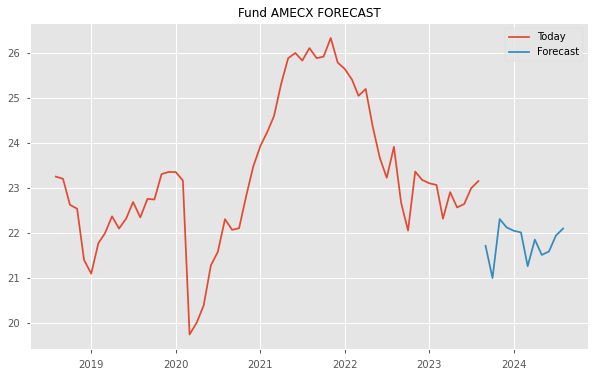

In [74]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(y, label='Today')
ax.plot(forecast, label='Forecast')

ax.set_title ('Fund AMECX FORECAST')

plt.legend();

### Conclusion

In the next year, the price will likely drop to 21 dollars in the next year. Oscillating between $ 21  - $ 22 dollars

### Next Steps

- I recommend that the time horizon for investment to be shorter than 1 year, while using dataset within a three year period

- I recommend being patient, and observing this projection/prediction in the next year prior to utilizing this model 

- I recommend using this time series in multiple funds and testing it out